<a href="https://colab.research.google.com/github/dbetanc1/MAT421/blob/main/Module_C_Section_19_1%2C_19%2C2%2C_19_3%2C_19_4_19_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 19 Root Finding**



Finding the roots of functions is important in many engineering applications such as signal processing and optimization. 

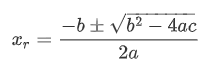




**Section 19.1 Root Finding Problem Statement**

In [ ]:
# TRY IT! Using fsolve function from scipy to compute the root of f(x)=cos(x)-x near -2. 
# Verify that the solution is a root (or close enough).

import numpy as np
from scipy import optimize

f = lambda x: np.cos(x)-x
r = optimize.fsolve(f, -2)
print("r=", r)

#Verify the solution is a root
result = f(r)
print("results=", result)


r= [0.73908513]
results= [0.]


In [ ]:
#TRY IT! The function f(x)= 1/x has no root. Use the fsolve function to try to 
#compute the root of f(x)= 1/x. Turn on the full_output to see what’s going on. 
#Remember to check the documentation for details.

f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r=", r)

result = f(r)
print("results=", result)

print(mesg)

# We can see that, the value r we got is not a root, even though the f(r) is a 
# very small number. Since we turned on the full_output, which have more information. 
# A message will be returned if no solution is found, and we can see mesg
# details for the cause of failure - “The number of calls to function has reached maxfev = 400.”

r= [-3.52047359e+83]
results= [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.


**Section 19.2 Tolerance**


*   Error is a deviation from an expected or computed value.
*    Tolerance is the level of error that is acceptable for an engineering application. 
*   Computer program has converged to a solution when it has found a solution with an error smaller than the tolerance. 
*   When computing numerical analysis, it is important to establish both a metric for error and a tolerance that is suitable for application.

In [ ]:
from math import e
#TRY IT! Let error be measured by e = |f(x)| and tol be the acceptable level of error. The function f(x)= x^2 + tol/2
# has no real roots. However, |f(0)| = tol/2 and is therefore acceptable as a solution for a root finding program.
from numpy import array

tol = e
f = lambda x: x**2 + tol/2
r = optimize.fsolve(f, tol)
print("r=", r)

result = f(r)
print("results=", result)

print(mesg)

NameError: ignored

In [ ]:
from math import e
# TRY IT! Let error be measured by e = |xi+1 - xi| and tol be the acceptable level of error. The function f(x) = 1/x 
# has no real roots, but the guesses xi = -tol/4 and xi+1= tol/4 have an error of e = tol/2 and is
# an acceptable solution for a computer program.
from numpy import array

tol = 2*e
f = lambda x: 1/x
r = optimize.fsolve(f, tol)
print("r=", r)

result = f(r)
print("results=", result)

print(mesg)

r= [9.56963951e+83]
results= [1.04497144e-84]
The number of calls to function has reached maxfev = 400.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


**Section 19.3 Bisection Method**

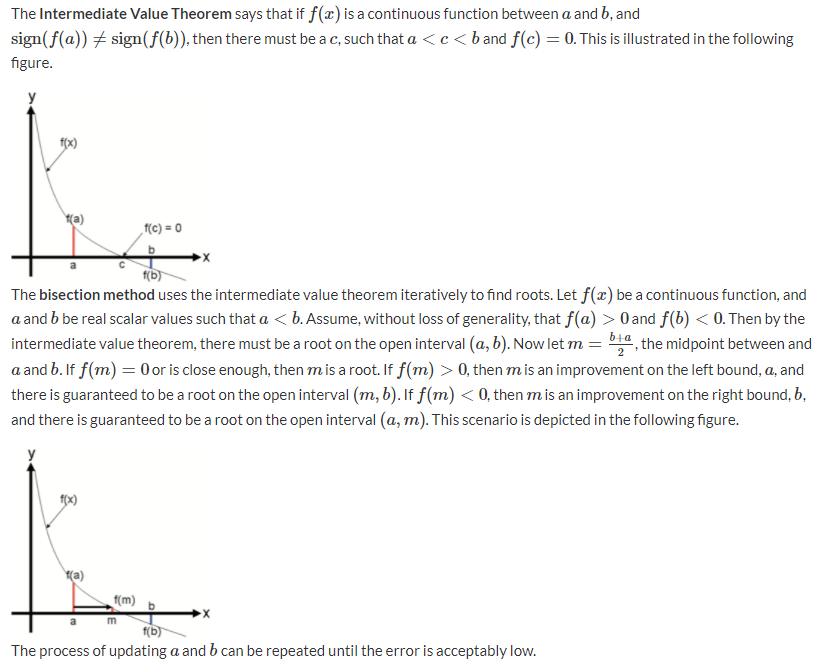

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html

In [6]:
#TRY IT! Program a function my_bisection(f, a, b, tol) that approximates a root 
#r of f, bounded by a and b to within |f(a+b2)|<tol.

import numpy as np

def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [8]:
# TRY IT! The 2–√ can be computed as the root of the function f(x)=x2−2. Starting at a=0 and b=2,
# use my_bisection to approximate the 2–√ to a tolerance of |f(x)|<0.1 and |f(x)|<0.01. 
# Verify that the results are close to a root by plugging the root back into the function.

f = lambda x: x**2 - 2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


In [9]:
# TRY IT! See what will happen if you use a=2 and b=4 for the above function.

f = lambda x: x**2 - 2

r1 = my_bisection(f, 2, 4, 0.01)
print("r1 =", r1)
r01 = my_bisection(f, 2, 4, 0.01)

print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

Exception: ignored

**Section 19.4 Newton-Raphson Method**

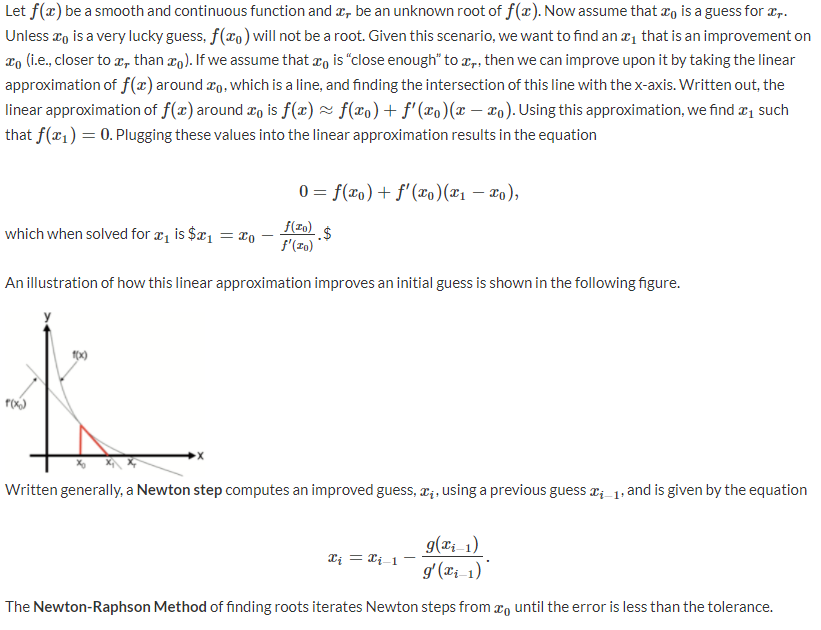

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html

In [10]:
# TRY IT! Again, the 2–√ is the root of the function f(x)=x2−2. Using x0=1.4 as 
# a starting point, use the previous equation to estimate 2–√. Compare this 
# approximation with the value computed by Python’s sqrt function.
# x=1.4−1.42−22(1.4)=1.4142857142857144

import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) = ", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) =  1.4142135623730951


In [17]:
# TRY IT! Write a function my_newton(f,df,x0,tol), where the output is an estimation 
# of the root of f, f is a function object f(x), df is a function object to f′(x), 
# x0 is an initial guess, and tol is the error tolerance. The error measurement should be |f(x)|.

def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [18]:
#TRY IT! Use my_newton= to compute 2–√ to within tolerance of 1e-6 starting at x0 = 1.5.

estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) = ", np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) =  1.4142135623730951


If x0 is close to xr, then it can be proven that, in general, the Newton-Raphson method converges to xr much faster than the bisection method. However since xr is initially unknown, there is no way to know if the initial guess is close enough to the root to get this behavior unless some special information about the function is known a priori (e.g., the function has a root close to x=0). In addition to this initialization problem, the Newton-Raphson method has other serious limitations. For example, if the derivative at a guess is close to 0, then the Newton step will be very large and probably lead far away from the root. Also, depending on the behavior of the function derivative between x0 and xr, the Newton-Raphson method may converge to a different root than xr that may not be useful for our engineering application.

In [19]:
# TRY IT! Compute a single Newton step to get an improved approximation of the
# root of the function f(x)=x3+3x2−2x−5 and an initial guess, x0=0.29.

x0 = 0.29
x1 = x0-(x0**3+3*x0**2-2*x0-5)/(3*x0**2+6*x0-2)
print("x1 =", x1)

x1 = -688.4516883116648


In [22]:
# TRY IT! Consider the polynomial f(x)=x3−100x2−x+100. This polynomial has a root 
# at x=1 and x=100. Use the Newton-Raphson to find a root of f starting at x0=0.

x0 = 0
x1 = x0-(x0**3-100*x0**2-x0+100)/(3*x0**2-200*x0-1)
print("x1 =", x1)

x1 = 100.0


**Section 19.5 Root Finding in Python**

As you may think, Python has the existing root-finding functions for us to use to make things easy. The function we will use to find the root is f_solve from the scipy.optimize.

The f_solve function takes in many arguments that you can find in the documentation, but the most important two is the function you want to find the root, and the initial guess.

In [23]:
from scipy.optimize import fsolve

f = lambda x: x**3-100*x**2-x+100

fsolve(f, [2, 80])

array([  1., 100.])